In [1]:
import velvetvae as vt

# general packages
import numpy as np
import pandas as pd
import torch
from scipy.sparse import issparse

# velocity packages
import scanpy as sc
import scvelo as scv
import anndata as ann

# plotting packages
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, trange
from IPython.display import clear_output

# color palette object
from colors import colorpalette as colpal

Global seed set to 0
/camp/home/maizelr/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/camp/home/maizelr/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
scifate = sc.read_h5ad(f'../../data/other_metlab/scifate/scifate_benchmark.h5ad')
scntseq = sc.read_h5ad(f'../../data/other_metlab/scntseq/scntseq_benchmark.h5ad')
wtmpseq = sc.read_h5ad(f'../../data/other_metlab/welltempseq/welltempseq_benchmark.h5ad')

# 1A. Metabolic labelling visualisation

In [3]:
scifate

AnnData object with n_obs × n_vars = 4279 × 984
    obs: 'all_exon', 'all_intron', 'all_reads', 'doublet_score', 'new_all_reads', 'new_exon_reads', 'new_intron_reads', 'sample', 'treatment_time', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'label_rate'
    var: 'gene_id', 'gene_type', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_counts'
    obsm: 'X_pca', 'X_pca_smooth'
    varm: 'precomputed_PCs'
    layers: 'new', 'old', 'total'

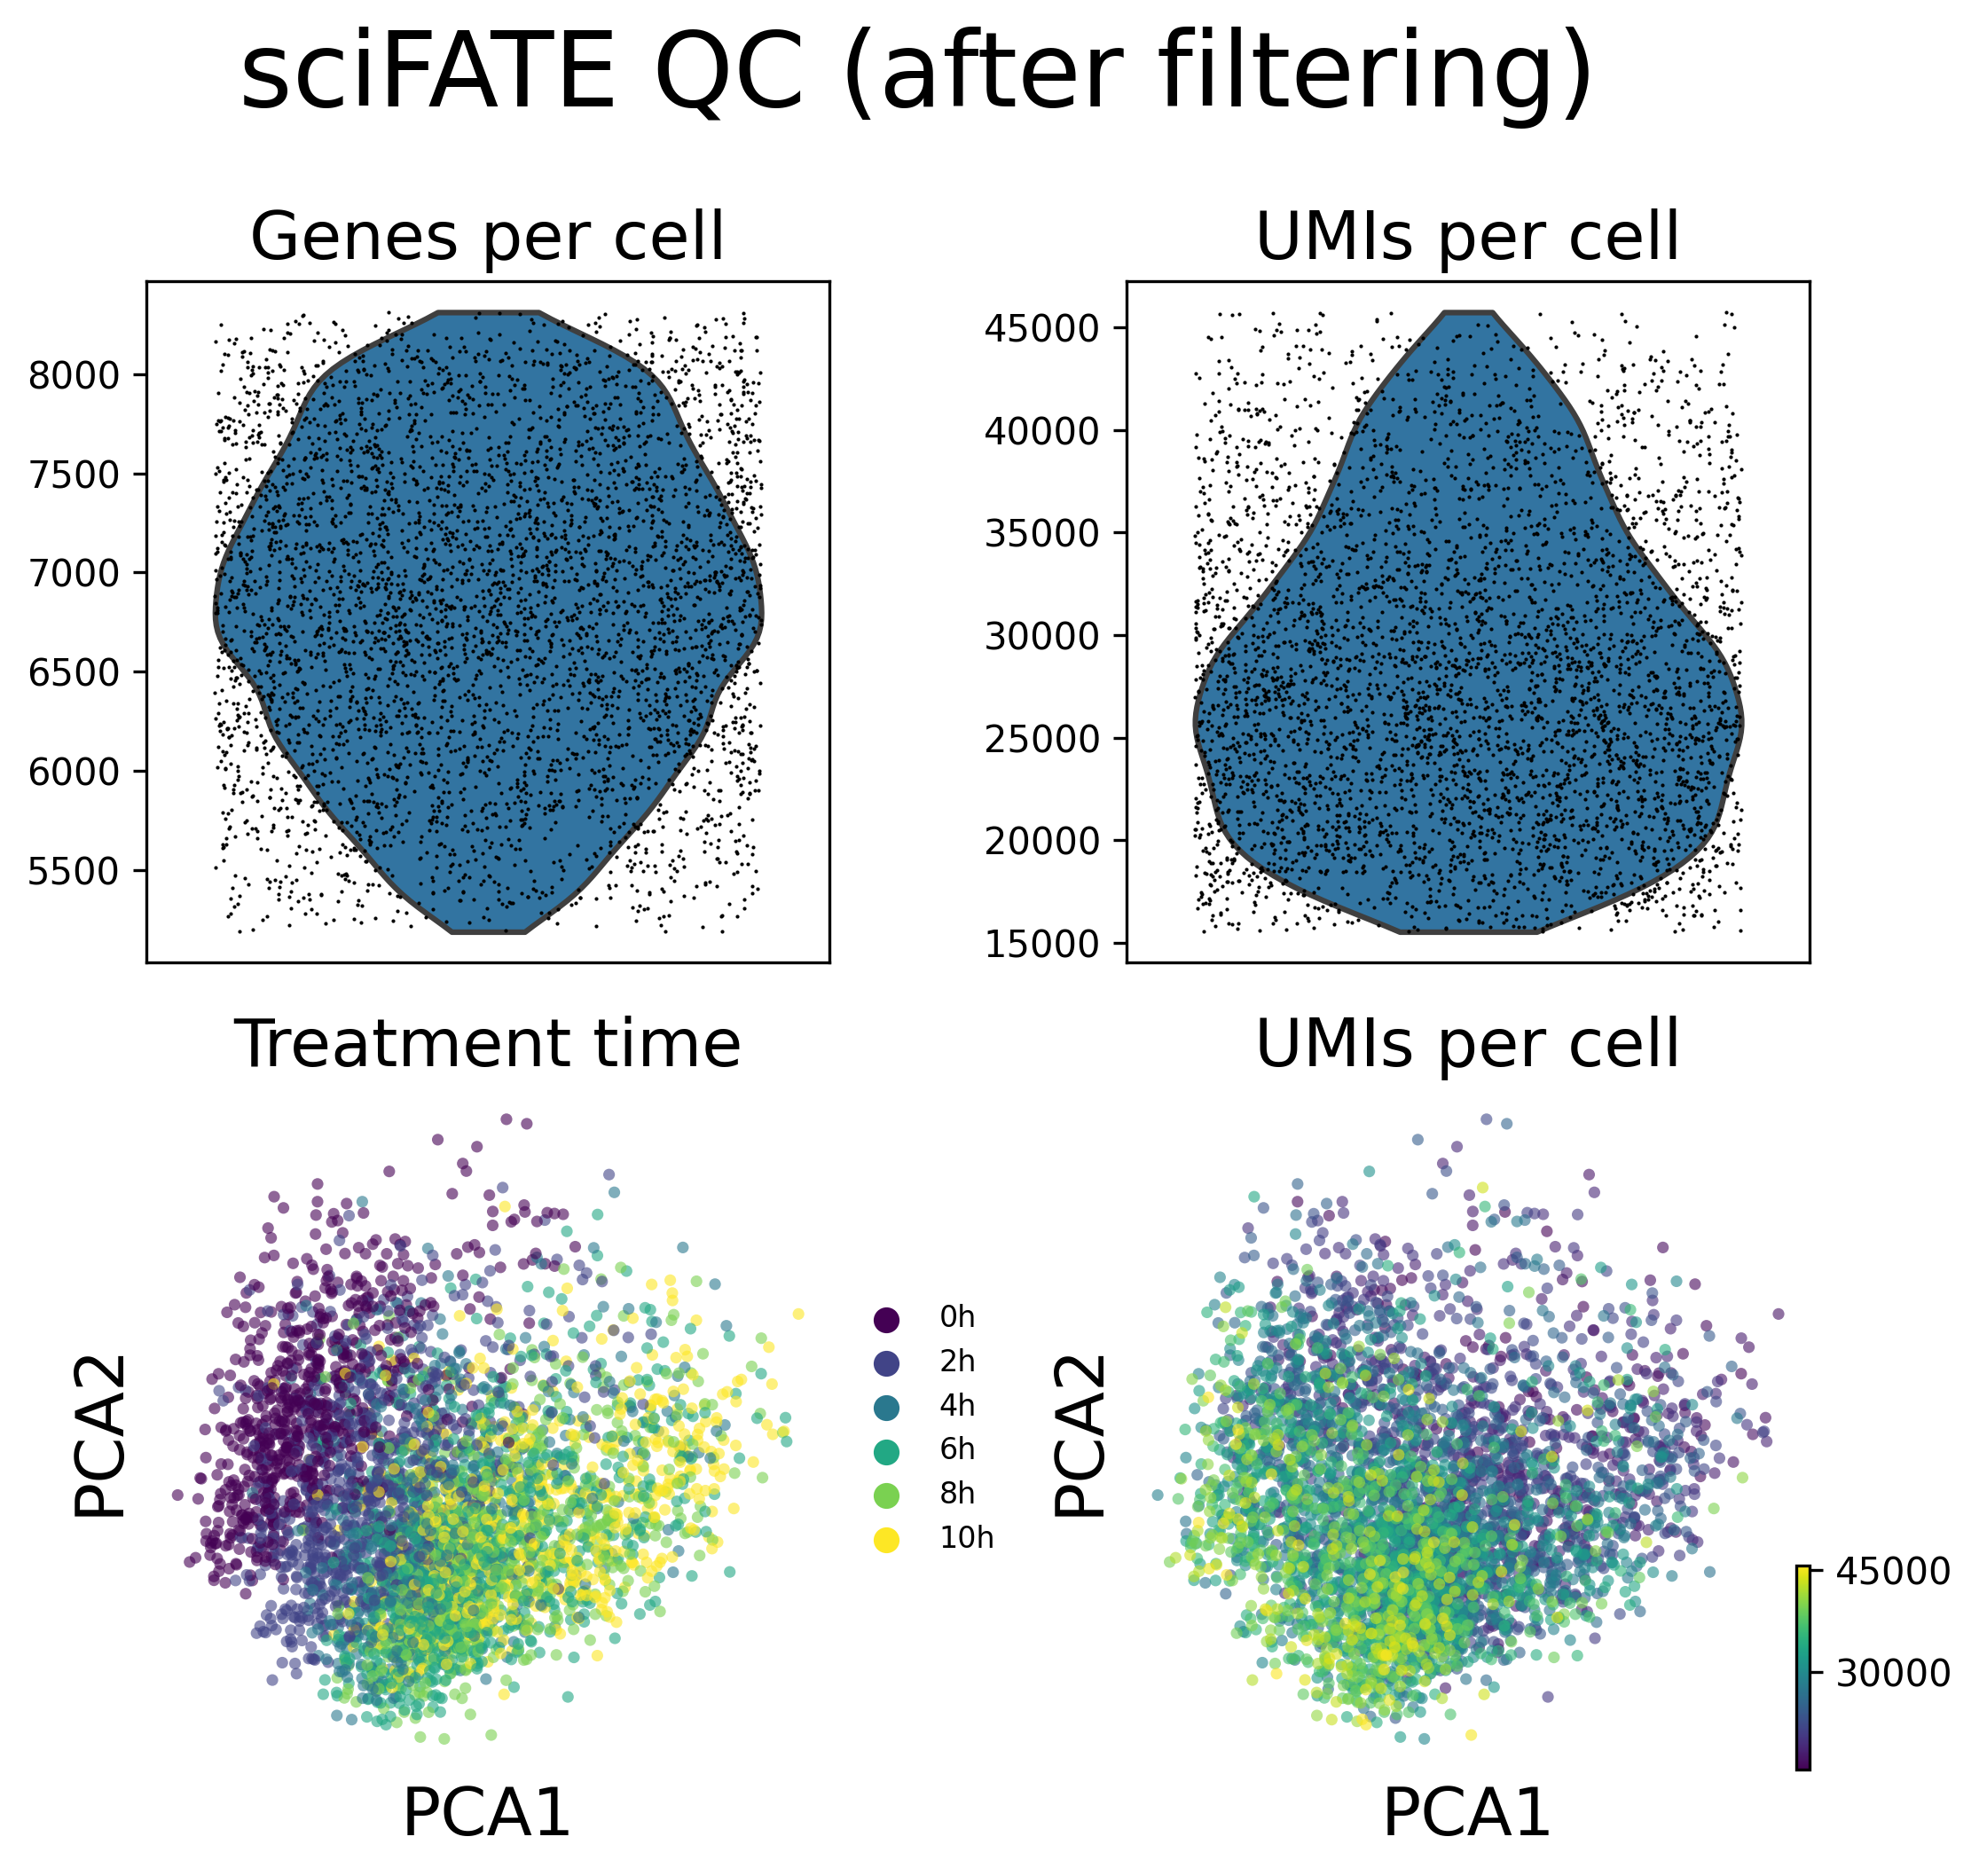

In [4]:
adata = scifate.copy()

fig = plt.figure(figsize=(7,7), dpi=300)
(ax1, ax2), (ax3, ax4) = fig.subplots(2,2)
sc.pl.violin(adata, ['n_genes_by_counts'], ax=ax1, show=False, jitter=0.4,stripplot=True)
ax1.set_title("Genes per cell", fontsize=18)
ax1.set_ylabel("", fontsize=18)
ax1.set_xlabel("", fontsize=18)
ax1.set_xticks([])
sc.pl.violin(adata, ['total_counts'], ax=ax2, show=False, jitter=0.4,stripplot=True)
ax2.set_title("UMIs per cell", fontsize=18)
ax2.set_xticks([])
ax2.set_ylabel("", fontsize=18)
ax2.set_xlabel("", fontsize=18)
plt.tight_layout()
plt.suptitle("sciFATE QC (after filtering)", y=1, fontsize=28)

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')

scv.pl.scatter(
    adata,
    basis="pca",
    color=['treatment_time'],
    size=40, alpha=.6,
    legend_loc='right margin',
    palette='viridis',
    legend_fontsize=8, 
    legend_fontoutline=10,
    title='',
    show=False, 
    components='1,2',
    ax=ax3
)

ax3.set_xlabel("PCA1", fontsize=18)
ax3.set_title("Treatment time", fontsize=18)
ax3.set_ylabel("PCA2", fontsize=18)

scv.pl.scatter(
    adata,
    basis="pca",
    color=['total_counts'],
    size=40, alpha=.6,
    legend_loc='right margin',
    palette='viridis',
    legend_fontsize=8, 
    legend_fontoutline=10,
    title='',
    show=False, 
    components='1,2',
    ax=ax4
)

ax4.set_xlabel("PCA1", fontsize=18)
ax4.set_title("UMIs per cell", fontsize=18)
ax4.set_ylabel("PCA2", fontsize=18)

plt.tight_layout()
plt.savefig('../../figures/2.2.0.1_scifate_QC.png', transparent=True, bbox_inches='tight')
plt.show()

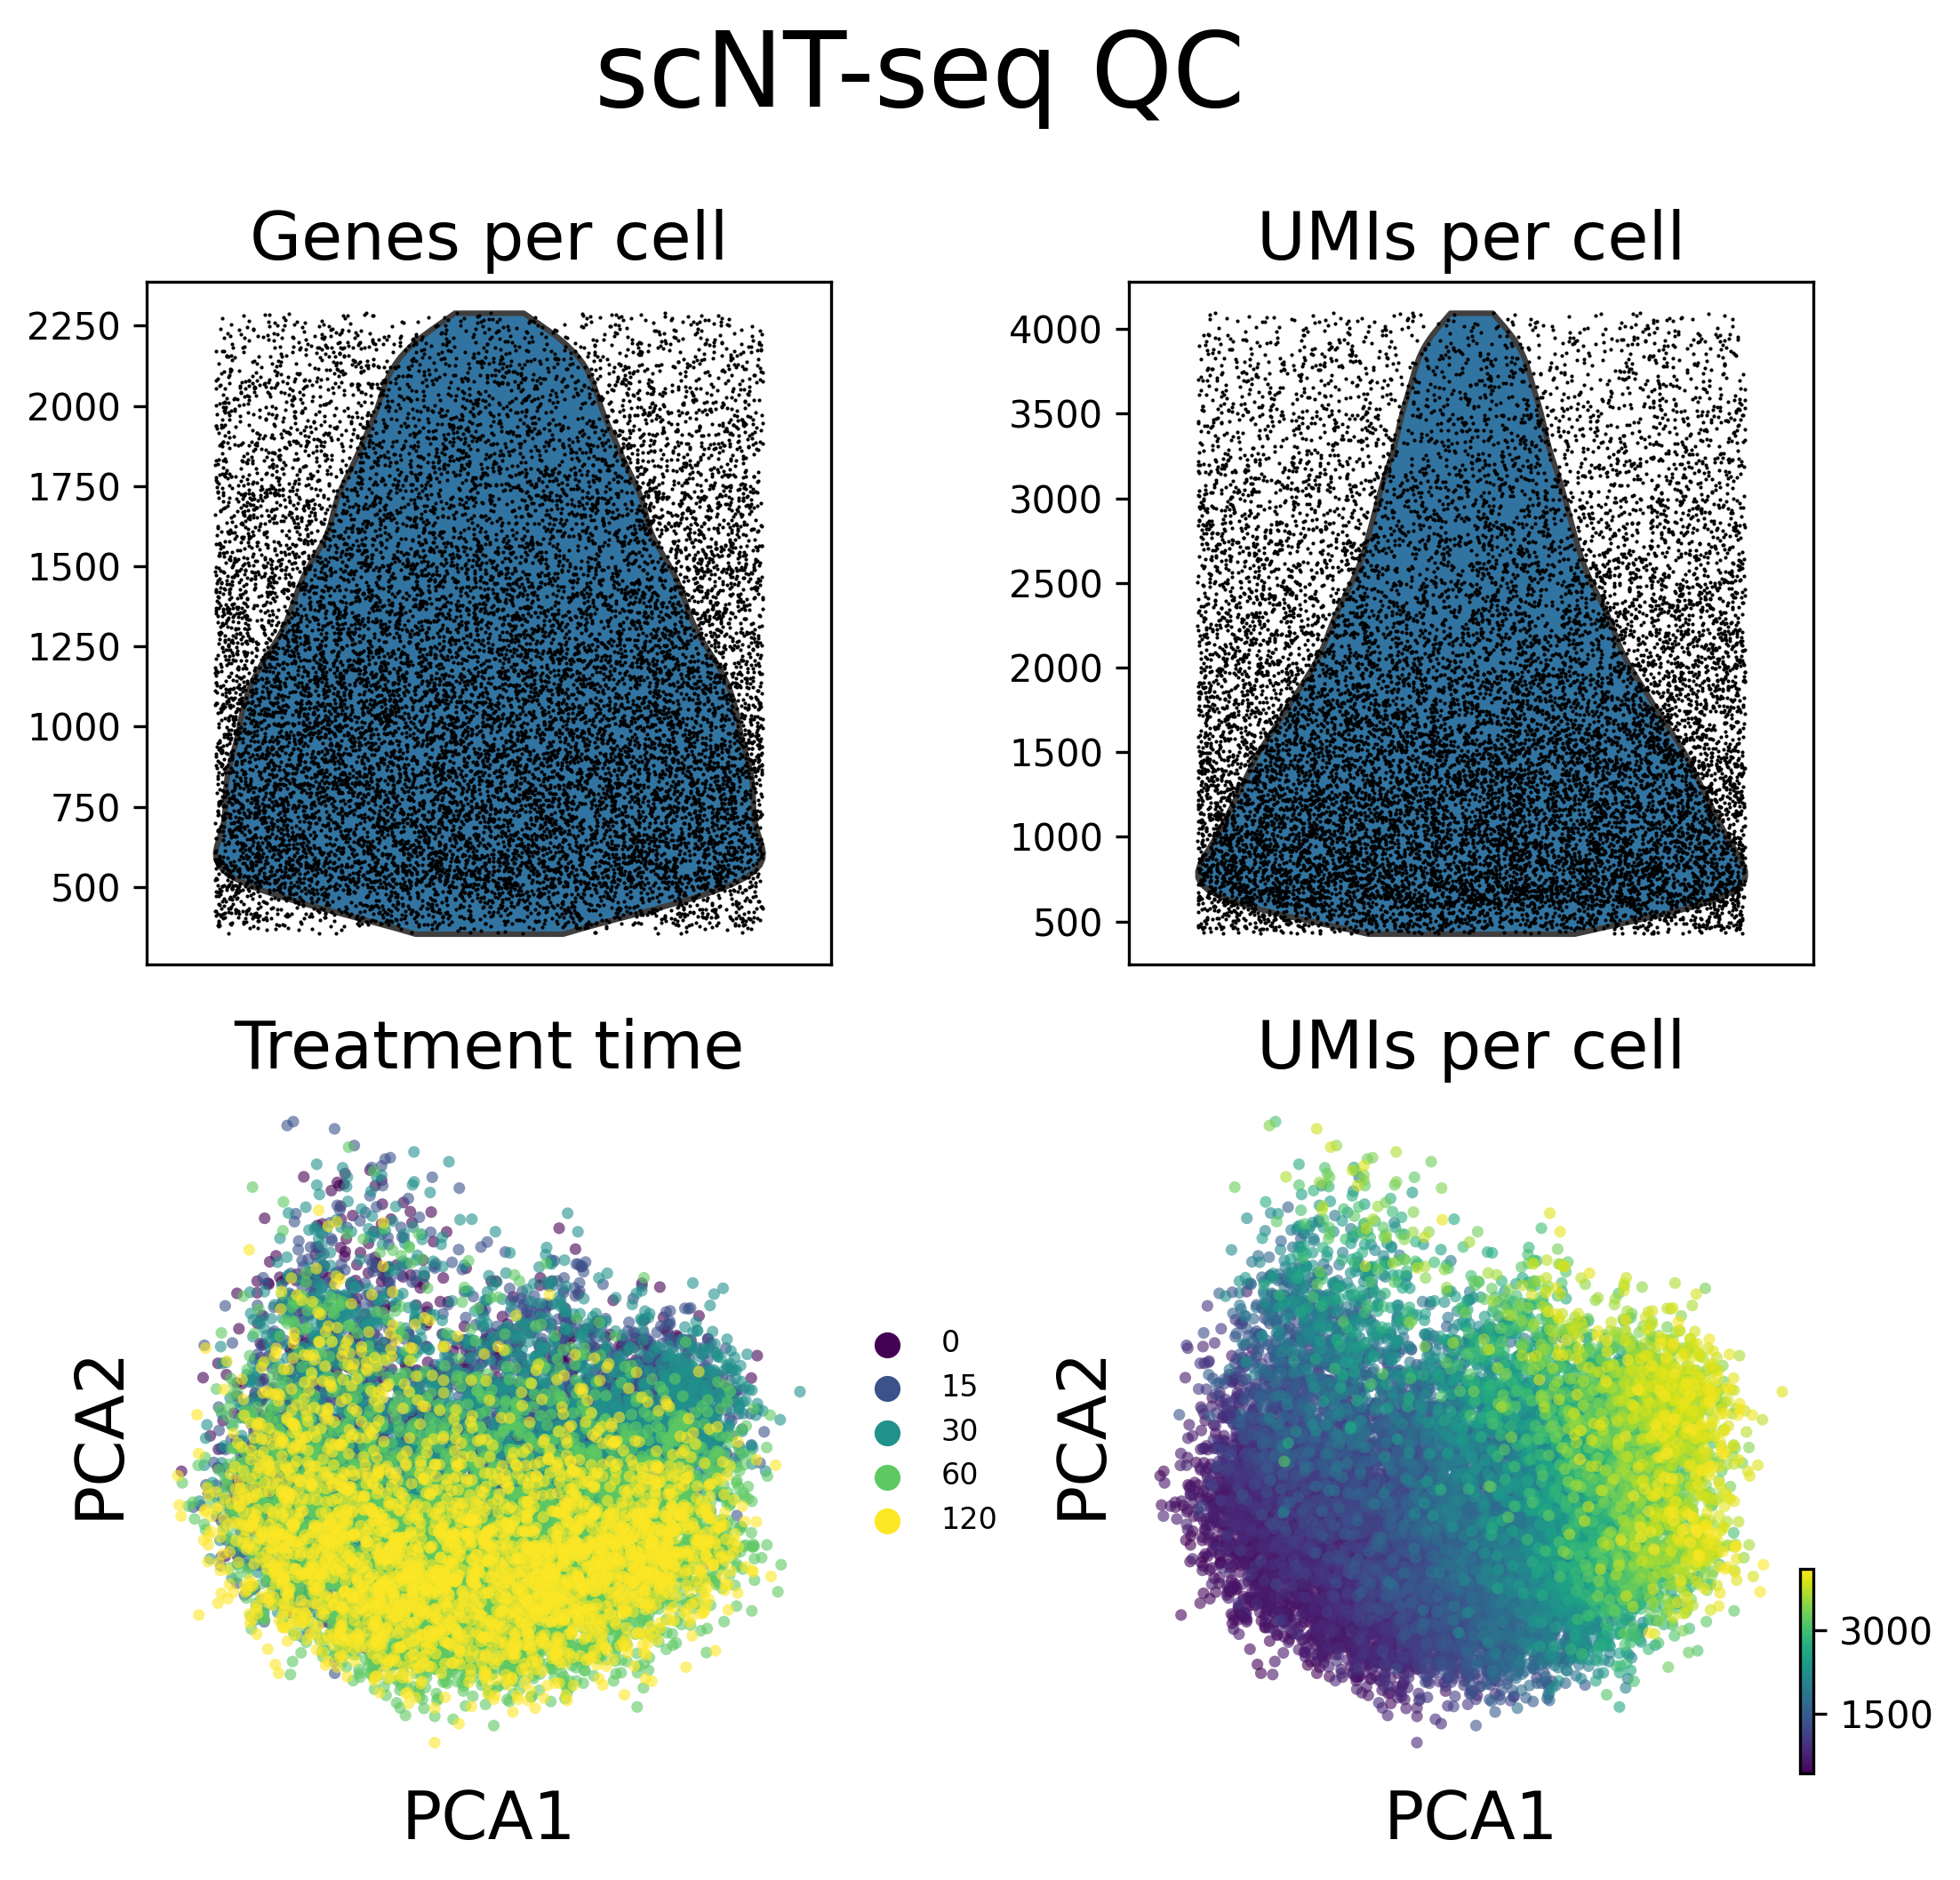

In [5]:
adata = scntseq.copy()

fig = plt.figure(figsize=(7,7), dpi=300)
(ax1, ax2), (ax3, ax4) = fig.subplots(2,2)
sc.pl.violin(adata, ['n_genes_by_counts'], ax=ax1, show=False, jitter=0.4,stripplot=True)
ax1.set_title("Genes per cell", fontsize=18)
ax1.set_ylabel("", fontsize=18)
ax1.set_xlabel("", fontsize=18)
ax1.set_xticks([])
sc.pl.violin(adata, ['total_counts'], ax=ax2, show=False, jitter=0.4,stripplot=True)
ax2.set_title("UMIs per cell", fontsize=18)
ax2.set_xticks([])
ax2.set_ylabel("", fontsize=18)
ax2.set_xlabel("", fontsize=18)
plt.tight_layout()
plt.suptitle("scNT-seq QC", y=1, fontsize=28)

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')

scv.pl.scatter(
    adata,
    basis="pca",
    color=['KCl_time'],
    size=40, alpha=.6,
    legend_loc='right margin',
    palette='viridis',
    legend_fontsize=8, 
    legend_fontoutline=10,
    title='',
    show=False, 
    components='1,2',
    ax=ax3
)

ax3.set_xlabel("PCA1", fontsize=18)
ax3.set_title("Treatment time", fontsize=18)
ax3.set_ylabel("PCA2", fontsize=18)

scv.pl.scatter(
    adata,
    basis="pca",
    color=['total_counts'],
    size=40, alpha=.6,
    legend_loc='right margin',
    palette='viridis',
    legend_fontsize=8, 
    legend_fontoutline=10,
    title='',
    show=False, 
    components='1,2',
    ax=ax4
)

ax4.set_xlabel("PCA1", fontsize=18)
ax4.set_title("UMIs per cell", fontsize=18)
ax4.set_ylabel("PCA2", fontsize=18)

plt.tight_layout()
plt.savefig('../../figures/2.2.0.2_scNTseq_QC.png', transparent=True, bbox_inches='tight')
plt.show()

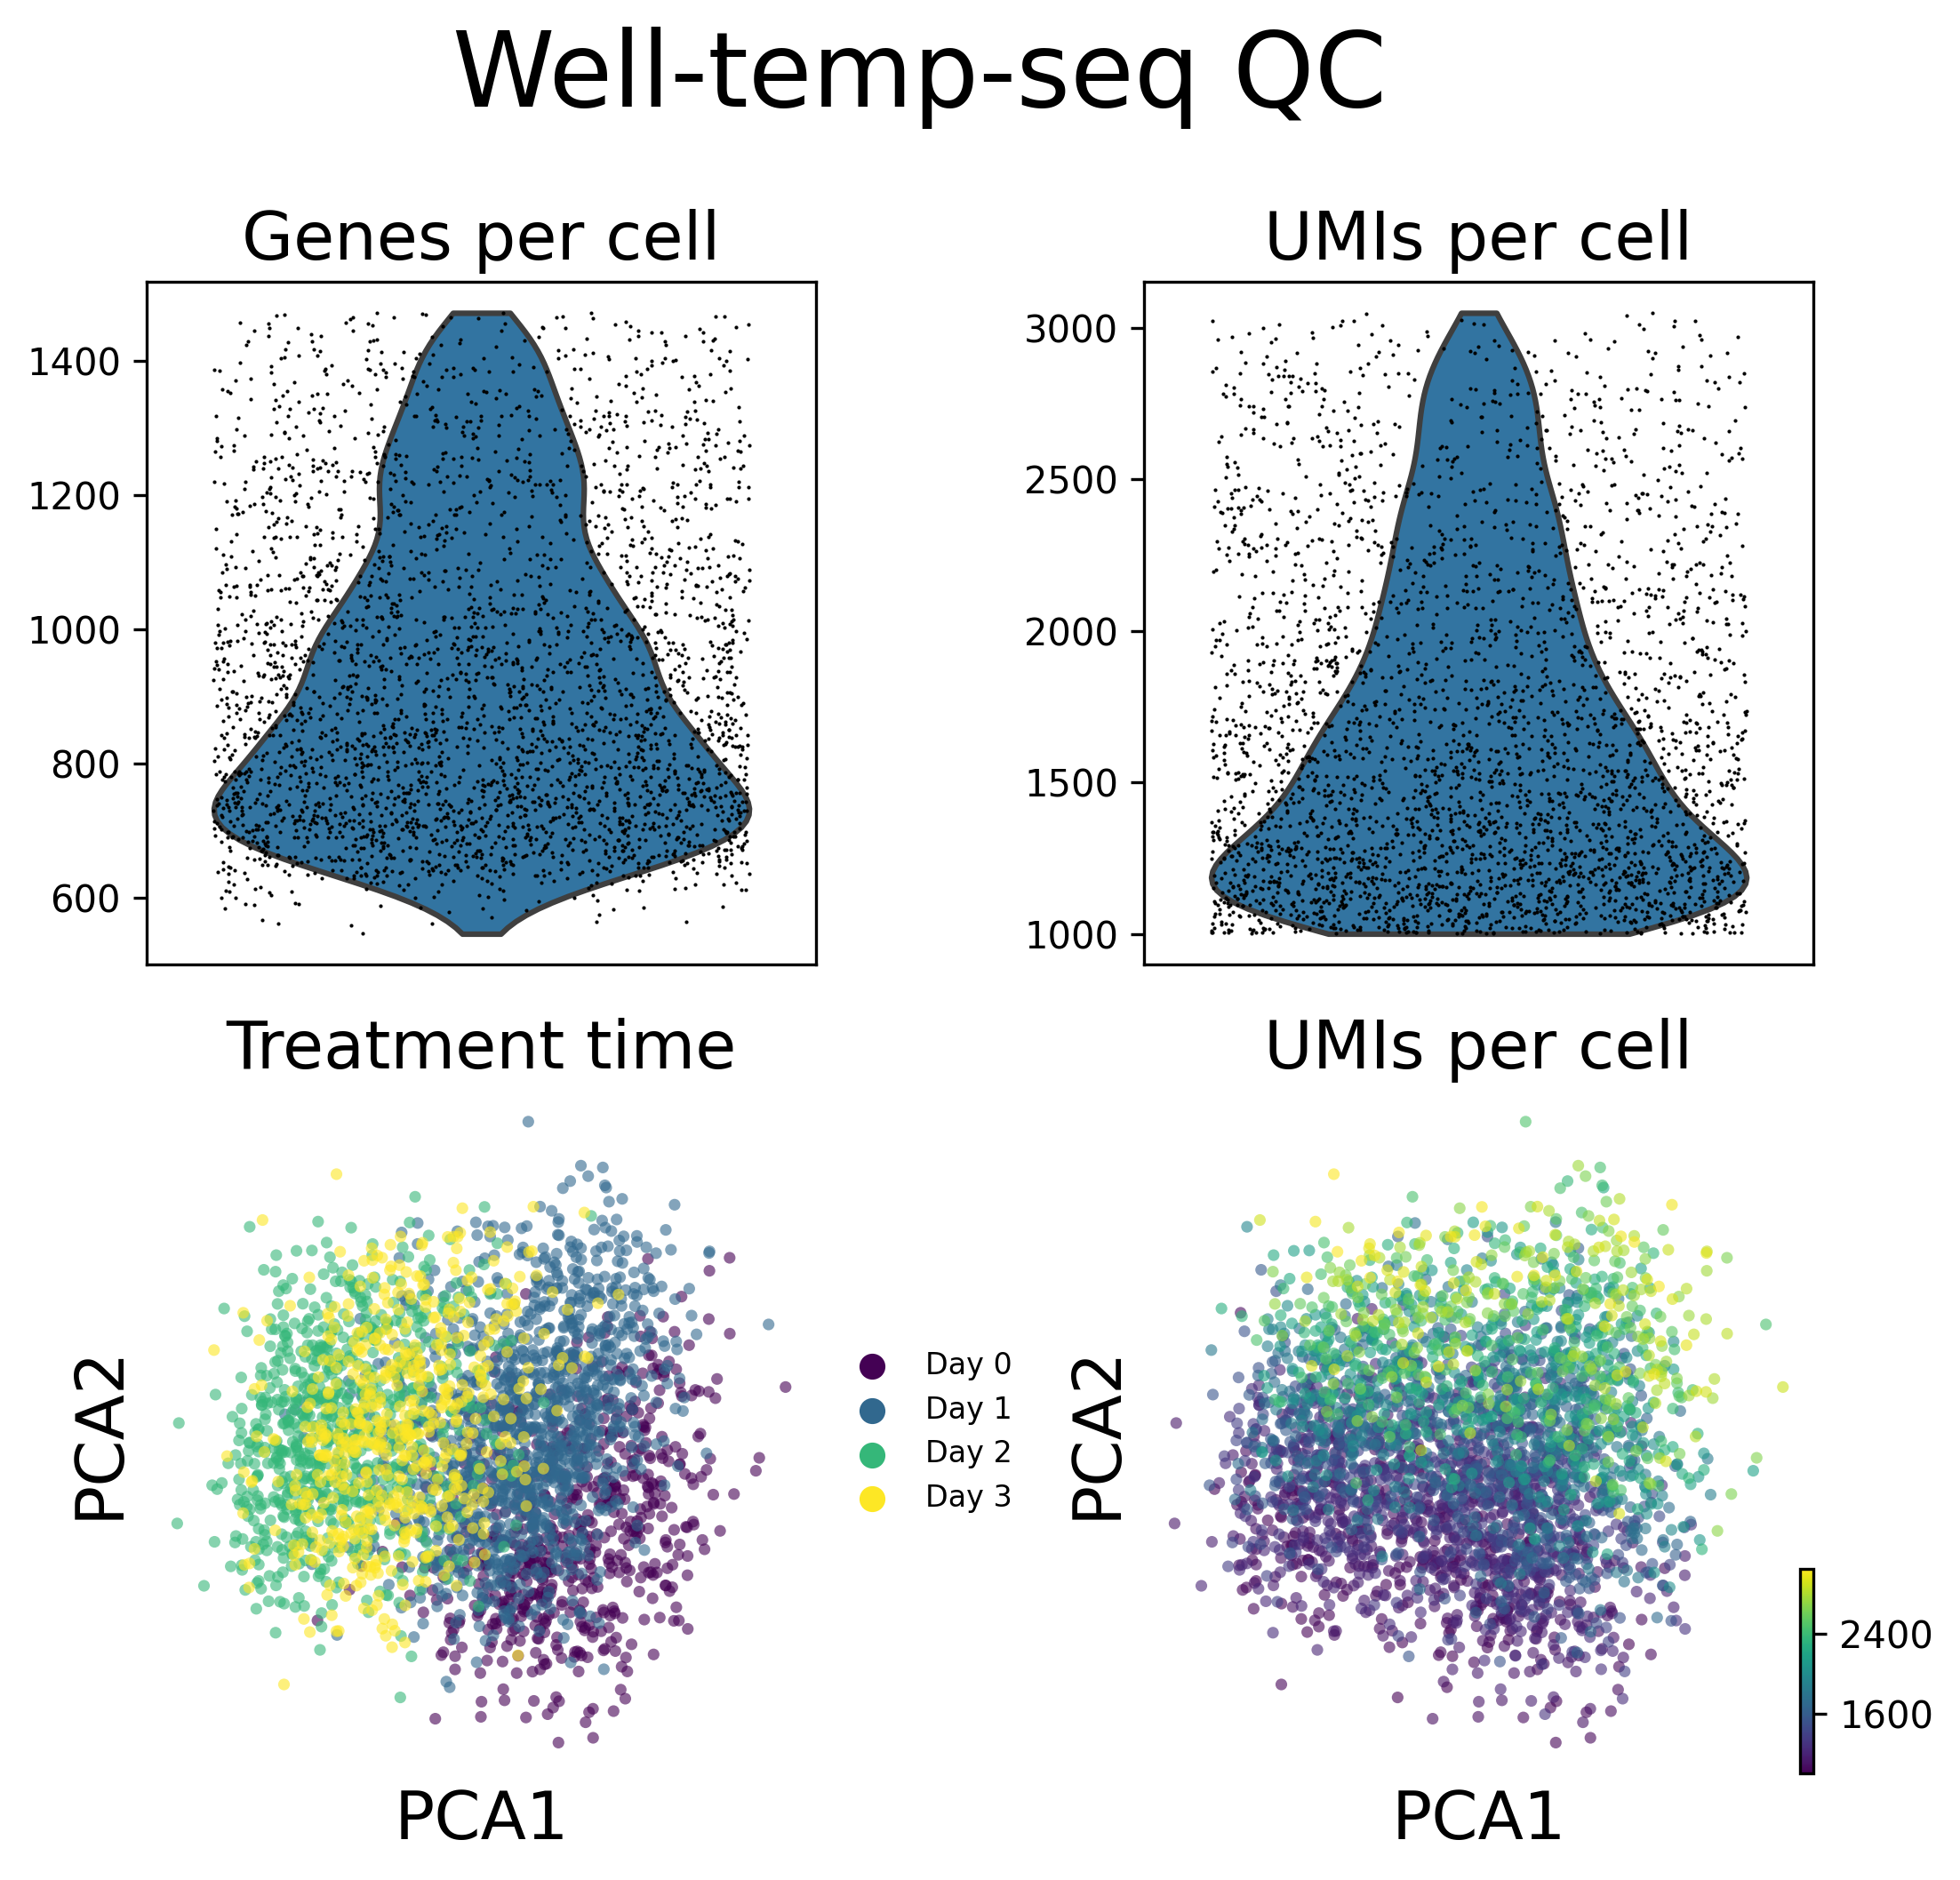

In [6]:
adata = wtmpseq.copy()

fig = plt.figure(figsize=(7,7), dpi=300)
(ax1, ax2), (ax3, ax4) = fig.subplots(2,2)
sc.pl.violin(adata, ['n_genes_by_counts'], ax=ax1, show=False, jitter=0.4,stripplot=True)
ax1.set_title("Genes per cell", fontsize=18)
ax1.set_ylabel("", fontsize=18)
ax1.set_xlabel("", fontsize=18)
ax1.set_xticks([])
sc.pl.violin(adata, ['total_counts'], ax=ax2, show=False, jitter=0.4,stripplot=True)
ax2.set_title("UMIs per cell", fontsize=18)
ax2.set_xticks([])
ax2.set_ylabel("", fontsize=18)
ax2.set_xlabel("", fontsize=18)
plt.tight_layout()
plt.suptitle("Well-temp-seq QC", y=1, fontsize=28)

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')

adata.obs['timepoint2'] = [f'Day {t}' for t in adata.obs.timepoint.values]

scv.pl.scatter(
    adata,
    basis="pca",
    color=['timepoint2'],
    size=40, alpha=.6,
    legend_loc='right margin',
    palette='viridis',
    legend_fontsize=8, 
    legend_fontoutline=10,
    title='',
    show=False, 
    components='1,2',
    ax=ax3
)

ax3.set_xlabel("PCA1", fontsize=18)
ax3.set_title("Treatment time", fontsize=18)
ax3.set_ylabel("PCA2", fontsize=18)

scv.pl.scatter(
    adata,
    basis="pca",
    color=['total_counts'],
    size=40, alpha=.6,
    legend_loc='right margin',
    palette='viridis',
    legend_fontsize=8, 
    legend_fontoutline=10,
    title='',
    show=False, 
    components='1,2',
    ax=ax4
)

ax4.set_xlabel("PCA1", fontsize=18)
ax4.set_title("UMIs per cell", fontsize=18)
ax4.set_ylabel("PCA2", fontsize=18)


plt.tight_layout()
plt.savefig('../../figures/2.2.0.3_welltempseq_QC.png', transparent=True, bbox_inches='tight')
plt.show()

# 1A. Metabolic labelling processing for benchmarking

In [ ]:
def process_for_pseudotime(adata, layer, n_neighbors=50):

    adata = vt.pp.size_normalize(
        adata, 
        genes=genes, 
        total_layer='total', 
        new_layer='new',
        unsparsify=True
    )
    
    X = adata.layers[layer]
    X = X.A if issparse(X) else X
    
    Xlog = np.log1p(X)
    pca = PCA()
    Xpca = pca.fit_transform(Xlog)
    adata.obsm['X_pca'] = Xpca
    adata.varm['precomputed_PCs'] = pca.components_
    
    if n_neighbors > 0:
        cnx = vt.pp.connectivities(total=X, n_neighbors=n_neighbors)
        Xsmooth = vt.pp.moments(X=X, cnx=cnx, n_neighbors=n_neighbors)
        Xlogsmooth = np.log1p(Xsmooth)
        pca = PCA()
        Xpcasmooth = pca.fit_transform(Xlogsmooth)
        adata.obsm['X_pca_smooth'] = Xpcasmooth
    else:
        adata.obsm['X_pca_smooth'] = Xpca
    return adata